## SHREYOSHI GHOSH HOMEWORK 4

Using the Scikit-Learn Library train the SVM model on the complete Iris data set using all of the features at once.

Run the SVM model (at least) four times using a different kernel each time.

Compare the results for each of the kernels.

Plot the results (including the decision boundaries) using two features at a time (since you’re limited to two dimension in plotting) for three of the cases (i.e., for three of the kernels).   Note that you need to fit the model using all four of the features but then plot the results using only two of the features.

Discuss the pros and cons of using each of the kernels that you’ve chosen.

In [68]:
import numpy as np 
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler

In [69]:
# loading data with column names
colnames = ['sepal_length', 'sepal_width','petal_length','petal_width','species']
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None, names = colnames)

# replacing species val with numerical val
for idx,row in df.iterrows():
    if row['species'] == 'Iris-setosa':
        df.loc[idx,'species'] = 0
    elif row['species'] == 'Iris-versicolor':
        df.loc[idx,'species'] = 1
    else:
        df.loc[idx,'species'] = 2
df['species'] = df['species'].values.astype(int)
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [70]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [71]:
# splitting data for model
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4], df['species'], test_size= 0.30, random_state= 777, shuffle = True, stratify= df['species'])
# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
# creating linear SVC
lin_SVC = SVC(C=10, kernel='linear')
lin_SVC = lin_SVC.fit(X_train,y_train)
y_pred = lin_SVC.predict(X_test)
y_train_pred = lin_SVC.predict(X_train)

train_acc = accuracy_score(y_pred=y_train_pred, y_true=y_train)
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)

print(f'SVC with linear kernel (C = 10) - training accuracy: {train_acc}, testing accuracy: {test_acc}')

SVC with linear kernel (C = 10) - training accuracy: 0.9809523809523809, testing accuracy: 0.9555555555555556


In [98]:
# creating rbf SVC
# i tried a few different gammas, ranging from 5 - 0.001, this value seems to have the highest test_accuracy 
# and seems to provide the best bias variance trade off

rbf_SVC = SVC(C=1.0, kernel='rbf', gamma=0.05)
rbf_SVC = rbf_SVC.fit(X_train,y_train)
y_pred = rbf_SVC.predict(X_test)
y_train_pred = rbf_SVC.predict(X_train)

train_acc = accuracy_score(y_pred=y_train_pred, y_true=y_train)
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)

print(f'SVC with rbf kernel (C = 1, gamma = 0.05) - training accuracy: {train_acc}, testing accuracy: {test_acc}')

SVC with rbf kernel (C = 1, gamma = 0.05) - training accuracy: 0.9619047619047619, testing accuracy: 0.9777777777777777


In [99]:
# creating poly SVC
# i tried a few different degrees, ranging from 1-5, this value seems to have the highest test_accuracy 
# and seems to provide the best bias variance trade off
poly_SVC = SVC(C=50, kernel='poly', degree=3)
poly_SVC = poly_SVC.fit(X_train,y_train)
y_pred = poly_SVC.predict(X_test)
y_train_pred = poly_SVC.predict(X_train)

train_acc = accuracy_score(y_pred=y_train_pred, y_true=y_train)
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)

print(f'SVC with poly kernel (C = 50, degree = 3) - training accuracy: {train_acc}, testing accuracy: {test_acc}')

SVC with poly kernel (C = 50, degree = 3) - training accuracy: 0.9904761904761905, testing accuracy: 0.9777777777777777


In [100]:
# creating sigmoid SVC
# i tried a few different coef, ranging from -5 - 10, this value seems to have the highest test_accuracy 
# and seems to provide the best bias variance trade off
sig_SVC = SVC(C=100, kernel='sigmoid', coef0= -0.5)
sig_SVC = sig_SVC.fit(X_train,y_train)
y_pred = sig_SVC.predict(X_test)
y_train_pred = sig_SVC.predict(X_train)

train_acc = accuracy_score(y_pred=y_train_pred, y_true=y_train)
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)

print(f'SVC with sigmoid kernel (C = 100, coef = -0.5) - training accuracy: {train_acc}, testing accuracy: {test_acc}')

SVC with sigmoid kernel (C = 100, coef = -0.5) - training accuracy: 0.9333333333333333, testing accuracy: 0.9111111111111111


## Compare the results for each of the kernels.

Based on the training and testing accuracies from each model, the polynomial kernel yielded the best result with a polynomial degree of 3 and a C value of 50. This resulted in a training accuracy of 0.9905 and a testing accuracy of 0.9777. The dataset was split using a 70/30 train/test split and was standard scaled.

In [89]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, kernel, test_idx=None, resolution=0.02):

    if kernel == 'linear':
        classifier = SVC(C=10, kernel='linear')
    elif kernel == 'rbf':
        classifier = SVC(C=1.0, kernel='rbf', gamma=0.05)
    else:
        classifier = SVC(C=50, kernel='poly', degree=3)

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

    classifier = classifier.fit(X,y)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

   # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)
    plt.show()

decision boundaries for sepal length + sepal width linear


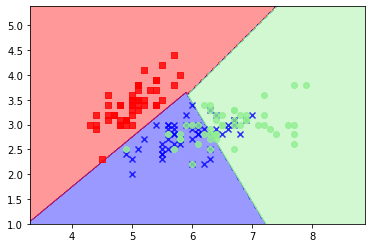

decision boundaries for sepal length + sepal width rbf


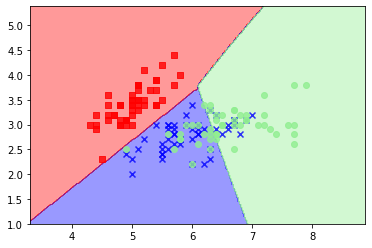

decision boundaries for sepal length + sepal width poly


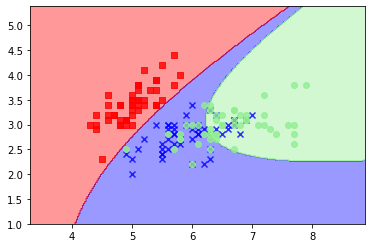

In [101]:
print(f'decision boundaries for sepal length + sepal width linear')
plot_decision_regions(X = df.iloc[:,[0,1]].values, y = df['species'], kernel = 'linear')
print(f'decision boundaries for sepal length + sepal width rbf')
plot_decision_regions(X = df.iloc[:,[0,1]].values, y = df['species'], kernel = 'rbf')
print(f'decision boundaries for sepal length + sepal width poly')
plot_decision_regions(X = df.iloc[:,[0,1]].values, y = df['species'], kernel = 'poly')


decision boundaries for sepal length + petal length linear


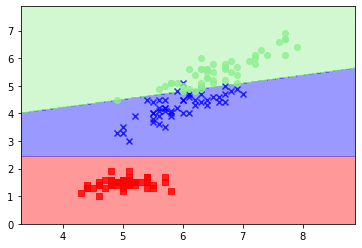

decision boundaries for sepal length + petal length rbf


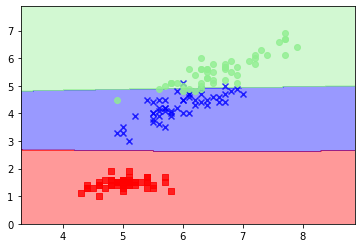

decision boundaries for sepal length + petal length poly


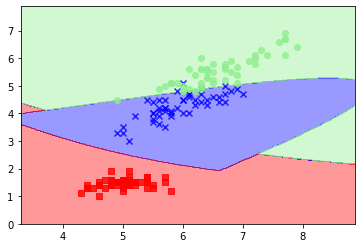

In [102]:
print(f'decision boundaries for sepal length + petal length linear')
plot_decision_regions(X = df.iloc[:,[0,2]].values, y = df['species'], kernel = 'linear')
print(f'decision boundaries for sepal length + petal length rbf')
plot_decision_regions(X = df.iloc[:,[0,2]].values, y = df['species'], kernel = 'rbf')
print(f'decision boundaries for sepal length + petal length poly')
plot_decision_regions(X = df.iloc[:,[0,2]].values, y = df['species'], kernel = 'poly')


decision boundaries for sepal length + petal width linear


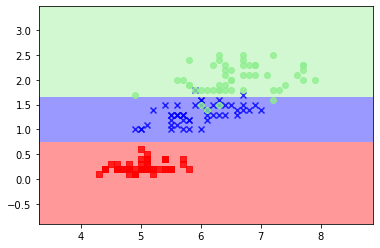

decision boundaries for sepal length + petal width rbf


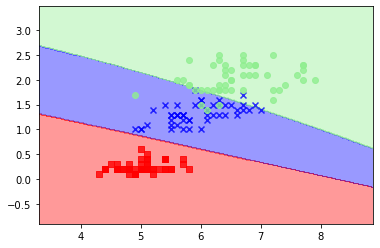

decision boundaries for sepal length + petal width poly


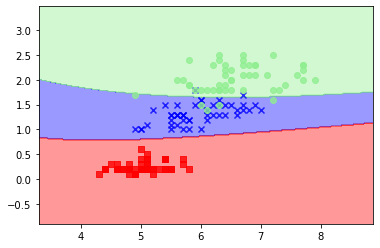

In [103]:
print(f'decision boundaries for sepal length + petal width linear')
plot_decision_regions(X = df.iloc[:,[0,3]].values, y = df['species'], kernel = 'linear')
print(f'decision boundaries for sepal length + petal width rbf')
plot_decision_regions(X = df.iloc[:,[0,3]].values, y = df['species'], kernel = 'rbf')
print(f'decision boundaries for sepal length + petal width poly')
plot_decision_regions(X = df.iloc[:,[0,3]].values, y = df['species'], kernel = 'poly')


decision boundaries for petal length + petal width linear


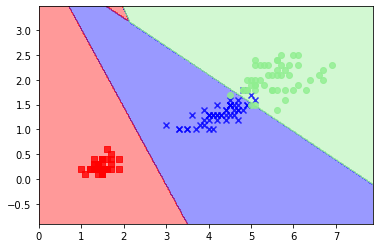

decision boundaries for petal length + petal width rbf


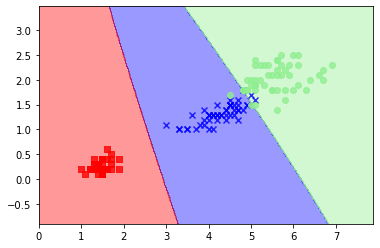

decision boundaries for petal length + petal width poly


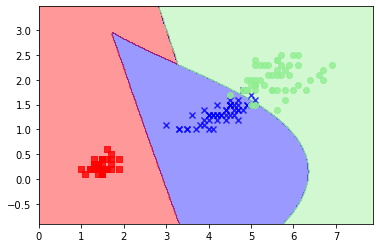

In [104]:
print(f'decision boundaries for petal length + petal width linear')
plot_decision_regions(X = df.iloc[:,[2,3]].values, y = df['species'], kernel = 'linear')
print(f'decision boundaries for petal length + petal width rbf')
plot_decision_regions(X = df.iloc[:,[2,3]].values, y = df['species'], kernel = 'rbf')
print(f'decision boundaries for petal length + petal width poly')
plot_decision_regions(X = df.iloc[:,[2,3]].values, y = df['species'], kernel = 'poly')

decision boundaries for sepal width + petal width linear


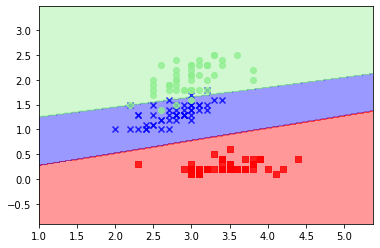

decision boundaries for sepal width + petal width rbf


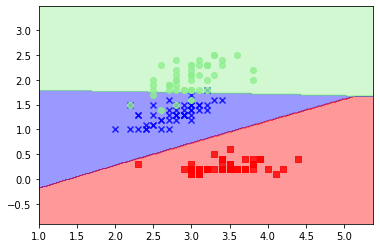

decision boundaries for sepal width + petal width poly


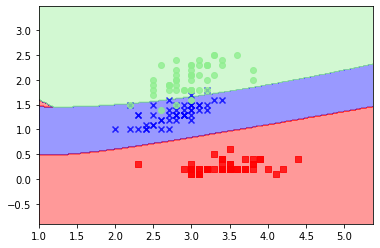

In [105]:
print(f'decision boundaries for sepal width + petal width linear')
plot_decision_regions(X = df.iloc[:,[1,3]].values, y = df['species'], kernel = 'linear')
print(f'decision boundaries for sepal width + petal width rbf')
plot_decision_regions(X = df.iloc[:,[1,3]].values, y = df['species'], kernel = 'rbf')
print(f'decision boundaries for sepal width + petal width poly')
plot_decision_regions(X = df.iloc[:,[1,3]].values, y = df['species'], kernel = 'poly')

decision boundaries for sepal width + petal length linear


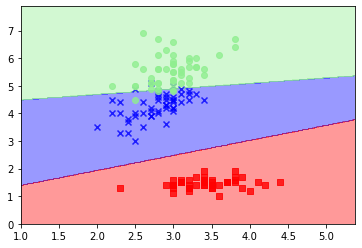

decision boundaries for sepal width + petal length rbf


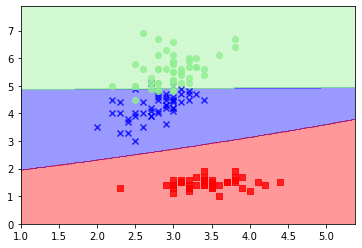

decision boundaries for sepal width + petal length poly


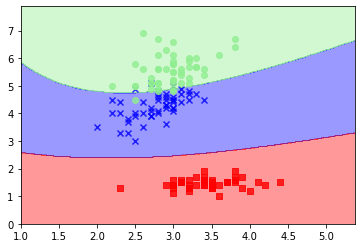

In [106]:
print(f'decision boundaries for sepal width + petal length linear')
plot_decision_regions(X = df.iloc[:,[1,2]].values, y = df['species'], kernel = 'linear')
print(f'decision boundaries for sepal width + petal length rbf')
plot_decision_regions(X = df.iloc[:,[1,2]].values, y = df['species'], kernel = 'rbf')
print(f'decision boundaries for sepal width + petal length poly')
plot_decision_regions(X = df.iloc[:,[1,2]].values, y = df['species'], kernel = 'poly')

## Decision Boundary Plot Conclusions
When looking at the linear decision boundary plots, it seems that when just considering two features, that sepal length + petal width combination does the best job of separating.  With the rbf kernel petal length + petal width had the best separation. With the poly kernel, both sepal width + petal length and petal length + petal width had better separation. 

Across all of the kernels I tested, it seems that petal length + petal width is the best combination of features in terms of decision boundaries

## Discuss the pros and cons of using each of the kernels that you’ve chosen
A con of the linear kernel is that it is only applicable to datasets that are linearly separable, while the poly and rbf kernels can be used for both linear and non linear decision boundaries.

The poly and rbf kernels have more control on the model using the degree and gamma hyperparameters, when compared to the linear kernel. I view this as both a pro and a con as while it allows for the ability to fine tune your model more, it also requires more trial and error for the right value of of each parameter.

Finally, the rbf and poly kernels has more possibility of overfitting due to the fact that they can create non linear decision boundaries. Improper hyperparameter tuning can cause those bounderies to fit the training data too closely.